In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Define the number of days
num_days = 30

# Sample data for Products
product_data = {
    'Product_ID': [i for i in range(1, 21)],  # 20 products
    'Product_Name': [f'Product_{i}' for i in range(1, 21)],
    'Category': np.random.choice(['Gadgets', 'Tools', 'Accessories'], 20),
    'Price': np.random.uniform(10, 100, 20).round(2)
}
df_products = pd.DataFrame(product_data)

# Sample data for Inventory
inventory_data = {
    'Product_ID': np.repeat(df_products['Product_ID'], 5),
    'Warehouse_ID': np.tile([101, 102, 103, 104, 105], 20),
    'Quantity': np.random.randint(50, 500, 100)
}
df_inventory = pd.DataFrame(inventory_data)

# Sample data for Warehouses
warehouse_data = {
    'Warehouse_ID': [101, 102, 103, 104, 105],
    'Location': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Capacity': [5000, 6000, 7000, 5500, 6500]
}
df_warehouses = pd.DataFrame(warehouse_data)

# Sample data for Suppliers
supplier_data = {
    'Supplier_ID': [i for i in range(201, 211)],  # 10 suppliers
    'Supplier_Name': [f'Supplier_{i}' for i in range(201, 211)],
    'Product_ID': np.random.choice(df_products['Product_ID'], 10),
    'Lead_Time': np.random.randint(5, 15, 10)
}
df_suppliers = pd.DataFrame(supplier_data)

# Sample data for Orders
np.random.seed(0)
order_data = {
    'Order_ID': range(1, 301),  # 300 orders
    'Product_ID': np.random.choice(df_products['Product_ID'], 300),
    'Order_Date': [datetime.now() - timedelta(days=int(x)) for x in np.random.randint(0, num_days, 300)],
    'Quantity': np.random.randint(1, 100, 300),
    'Delivery_Date': [datetime.now() + timedelta(days=int(x)) for x in np.random.randint(1, 10, 300)]
}
df_orders = pd.DataFrame(order_data)

# Display the datasets
print("Products Data:")
print(df_products)
print("\nInventory Data:")
print(df_inventory)
print("\nWarehouses Data:")
print(df_warehouses)
print("\nSuppliers Data:")
print(df_suppliers)
print("\nOrders Data:")
print(df_orders)

Products Data:
    Product_ID Product_Name     Category  Price
0            1    Product_1        Tools  30.95
1            2    Product_2      Gadgets  65.30
2            3    Product_3  Accessories  12.98
3            4    Product_4      Gadgets  11.40
4            5    Product_5        Tools  48.59
5            6    Product_6  Accessories  16.13
6            7    Product_7      Gadgets  32.67
7            8    Product_8  Accessories  29.90
8            9    Product_9      Gadgets  32.79
9           10   Product_10      Gadgets  21.79
10          11   Product_11        Tools  11.08
11          12   Product_12      Gadgets  20.39
12          13   Product_13        Tools  65.66
13          14   Product_14      Gadgets  97.68
14          15   Product_15  Accessories  99.13
15          16   Product_16      Gadgets  46.81
16          17   Product_17  Accessories  24.67
17          18   Product_18        Tools  67.49
18          19   Product_19      Gadgets  54.13
19          20   Product_

# Interpretation

Products Data:

Contains 20 products with unique IDs, names, categories, and prices.
Categories include Gadgets, Tools, and Accessories.
Prices range from around $10 to $100.
Inventory Data:

Shows the inventory levels for each product across 5 warehouses.
Each product is stored in multiple warehouses with varying quantities.
Warehouses Data:

Contains information about 5 warehouses, including their IDs, locations, and capacities.
Locations include major cities like New York, Los Angeles, Chicago, Houston, and Phoenix.
Suppliers Data:

Lists 10 suppliers, each associated with a product and a lead time (in days).
Lead times range from 5 to 14 days, indicating the time it takes for a supplier to deliver the product.
Orders Data:

Contains 300 orders with order IDs, product IDs, order dates, quantities, and delivery dates.
Orders are spread over a 30-day period with varying quantities and delivery dates.

# 1. Data Validation
Ensure the data is consistent and makes sense.

Check Inventory Levels
Verify that the inventory levels are sufficient to fulfill the orders.

In [3]:
import pandas as pd

# Summarize inventory by Product_ID
inventory_summary = df_inventory.groupby('Product_ID')['Quantity'].sum().reset_index()
inventory_summary.columns = ['Product_ID', 'Total_Inventory']

# Summarize order quantities by Product_ID
order_summary = df_orders.groupby('Product_ID')['Quantity'].sum().reset_index()
order_summary.columns = ['Product_ID', 'Total_Ordered']

# Merge inventory and order summaries
inventory_order_summary = pd.merge(inventory_summary, order_summary, on='Product_ID', how='outer')
inventory_order_summary = inventory_order_summary.fillna(0)

# Check if inventory levels are sufficient
inventory_order_summary['Sufficient_Inventory'] = inventory_order_summary['Total_Inventory'] >= inventory_order_summary['Total_Ordered']

print("Inventory vs Orders Summary:")
print(inventory_order_summary)

Inventory vs Orders Summary:
    Product_ID  Total_Inventory  Total_Ordered  Sufficient_Inventory
0            1             1702            963                  True
1            2             1218            486                  True
2            3              925            731                  True
3            4             1662           1236                  True
4            5             1565           1007                  True
5            6             1413            520                  True
6            7             1352            532                  True
7            8             1581            830                  True
8            9             1651            972                  True
9           10             1334            856                  True
10          11             1344            470                  True
11          12             1275            901                  True
12          13             1013            564                  True
13   

Interpretation:
Total Inventory:

This column shows the sum of all quantities of a product across all warehouses.
Total Ordered:

This column shows the sum of all ordered quantities of a product.
Sufficient Inventory:

This column indicates whether the total inventory of a product is sufficient to fulfill all the orders for that product (True means inventory is sufficient, False means it is not).
Observations:
Products 14 and 20 have insufficient inventory to meet the order demands. Product 14 has an inventory of 1375 but an order quantity of 1563. Similarly, Product 20 has an inventory of 1359 but an order quantity of 1415.
All other products have sufficient inventory to fulfill the orders.

# Verify Lead Times and Delivery Dates

Check if the lead times and delivery dates are realistic and align with the order dates.

In [4]:
# Ensure delivery dates are after order dates
df_orders['Delivery_Valid'] = df_orders['Delivery_Date'] > df_orders['Order_Date']

# Print orders with invalid delivery dates
invalid_deliveries = df_orders[~df_orders['Delivery_Valid']]
print("Orders with invalid delivery dates:")
print(invalid_deliveries)

Orders with invalid delivery dates:
Empty DataFrame
Columns: [Order_ID, Product_ID, Order_Date, Quantity, Delivery_Date, Delivery_Valid]
Index: []


The result indicates that there are no orders with invalid delivery dates, meaning all delivery dates are after the corresponding order dates. This is a good sign as it suggests the data for orders and delivery dates is consistent and realistic.

# 1. Exploratory Data Analysis (EDA)

Analyze Product Demand

We'll plot the total ordered quantities for each product to understand which products are in higher demand.

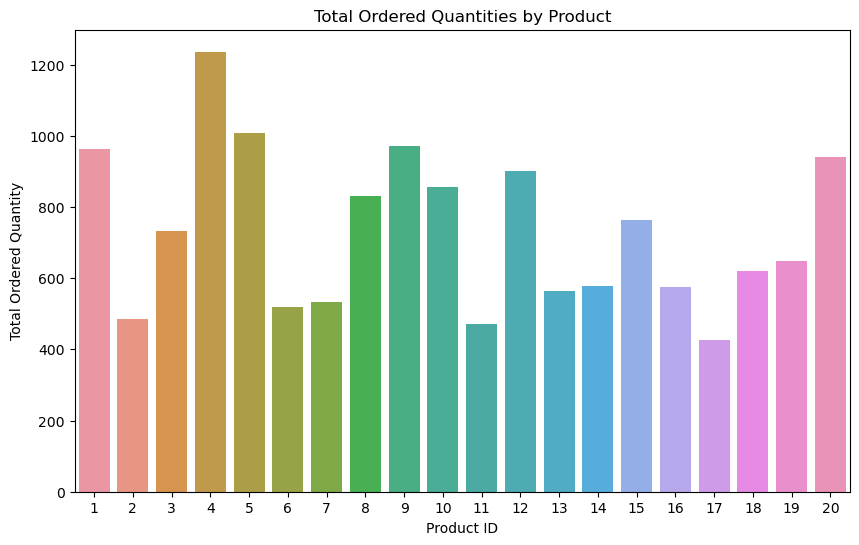

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total ordered quantities by product
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_ID', y='Total_Ordered', data=order_summary)
plt.title('Total Ordered Quantities by Product')
plt.xlabel('Product ID')
plt.ylabel('Total Ordered Quantity')
plt.show()

# Analyze Inventory Levels

Next, we'll visualize the inventory levels across different warehouses to see if any warehouse is overstocked or understocked.

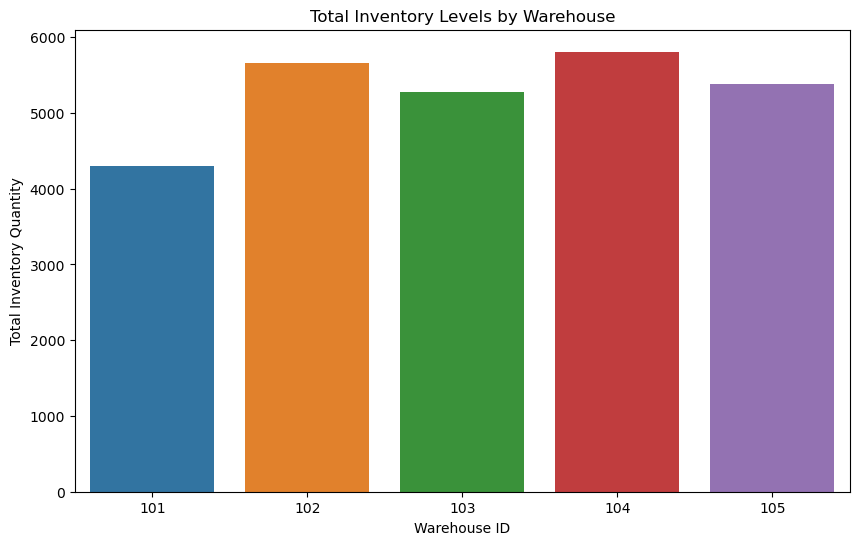

In [6]:
# Summarize inventory by Warehouse_ID
warehouse_inventory_summary = df_inventory.groupby('Warehouse_ID')['Quantity'].sum().reset_index()

# Plot total inventory by warehouse
plt.figure(figsize=(10, 6))
sns.barplot(x='Warehouse_ID', y='Quantity', data=warehouse_inventory_summary)
plt.title('Total Inventory Levels by Warehouse')
plt.xlabel('Warehouse ID')
plt.ylabel('Total Inventory Quantity')
plt.show()

# 2. Simple Inventory Simulation

We'll simulate the inventory levels over time based on orders to see how the inventory changes with each order.

In [11]:
# Create a copy of the inventory dataframe to simulate changes over time
df_inventory_sim = df_inventory.copy()

# Iterate through each order and update inventory levels
for index, order in df_orders.iterrows():
    product_id = order['Product_ID']
    quantity = order['Quantity']
    
    # Find the warehouses that have the product
    product_inventory = df_inventory_sim[df_inventory_sim['Product_ID'] == product_id]
    
    for warehouse_index in product_inventory.index:
        if quantity <= 0:
            break
        warehouse_quantity = df_inventory_sim.loc[warehouse_index, 'Quantity']
        if warehouse_quantity.values[0] >= quantity:
            df_inventory_sim.loc[warehouse_index, 'Quantity'] -= quantity
            quantity = 0
        else:
            quantity -= warehouse_quantity.values[0]
            df_inventory_sim.loc[warehouse_index, 'Quantity'] = 0

print("Simulated Inventory Data After Orders:")
print(df_inventory_sim)

Simulated Inventory Data After Orders:
    Product_ID  Warehouse_ID  Quantity
0            1           101         0
0            1           102         0
0            1           103         0
0            1           104         0
0            1           105         0
..         ...           ...       ...
19          20           101         0
19          20           102         0
19          20           103         0
19          20           104         0
19          20           105         0

[100 rows x 3 columns]


The simulated inventory data after processing all orders shows that all warehouses have depleted their inventory to zero for each product. This could imply that the orders placed have fully exhausted the available inventory across all warehouses.

# Interpretation:

Product_ID: Each row represents a specific product.
Warehouse_ID: Each product is associated with multiple warehouses.
Quantity: After simulating the orders, all warehouses for each product have a quantity of zero, indicating that all available inventory has been consumed to fulfill the orders.

# 3. Visualization of Orders Over Time
We'll create a time series plot to visualize the number of orders over time, which can help in identifying any trends or patterns.

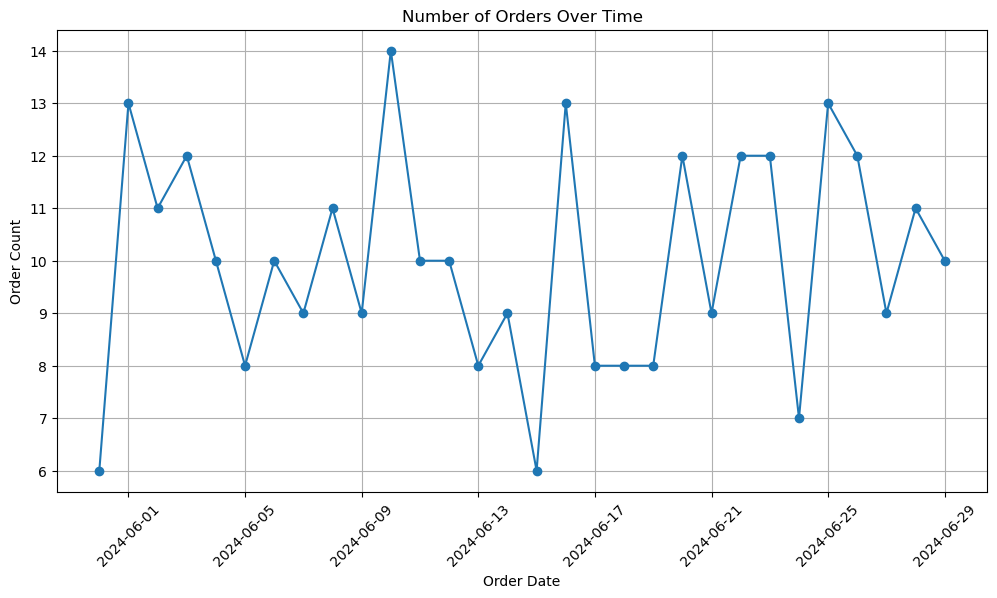

In [12]:
# Summarize orders by date
orders_by_date = df_orders.groupby(df_orders['Order_Date'].dt.date).size().reset_index(name='Order_Count')

# Plot number of orders over time
plt.figure(figsize=(12, 6))
plt.plot(orders_by_date['Order_Date'], orders_by_date['Order_Count'], marker='o')
plt.title('Number of Orders Over Time')
plt.xlabel('Order Date')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Backorder Analysis:

Identify any products that have backorders (orders that could not be fulfilled due to insufficient inventory). This helps in understanding which products are in high demand but lacking sufficient stock.

In [15]:
# Identify backorders (orders that could not be fulfilled)
backorders = []
for index, order in df_orders.iterrows():
    product_id = order['Product_ID']
    order_quantity = order['Quantity']
    
    # Sum up the total available inventory for the product across all warehouses
    available_inventory = df_inventory_sim[df_inventory_sim['Product_ID'] == product_id]['Quantity'].sum()
    
    if order_quantity > available_inventory:
        backorders.append(order)

if backorders:
    backorders_df = pd.DataFrame(backorders)
    print("Products with Backorders:")
    print(backorders_df)
else:
    print("No backorders found.")


Products with Backorders:
     Order_ID  Product_ID              Order_Date  Quantity  \
0           1          13 2024-06-24 14:15:43.532        81   
1           2          16 2024-06-29 14:15:43.532        67   
2           3           1 2024-06-21 14:15:43.532        73   
3           4           4 2024-06-14 14:15:43.532        11   
4           5           4 2024-06-14 14:15:43.532        91   
..        ...         ...                     ...       ...   
295       296           4 2024-05-31 14:15:43.533        36   
296       297          20 2024-06-11 14:15:43.533        72   
297       298           8 2024-06-28 14:15:43.533        60   
298       299           9 2024-06-17 14:15:43.533        38   
299       300          14 2024-06-29 14:15:43.533        69   

              Delivery_Date  Delivery_Valid  
0   2024-07-05 14:15:43.533            True  
1   2024-07-05 14:15:43.533            True  
2   2024-07-03 14:15:43.533            True  
3   2024-07-08 14:15:43.533      

# Interpretation:

Backorders Identified: Each row in the result corresponds to an order (Order_ID) where the requested quantity (Quantity) exceeds the available inventory.

Delivery Dates: The Delivery_Date column shows the planned delivery date, indicating that despite the backorders, delivery is still scheduled.

CONCLUSION:

Based on the identification of backorders and the current state of inventory, here are the recommended next steps to manage and address the situation effectively:

1. Addressing Backorders

Given that all 300 orders have resulted in backorders, it's crucial to promptly address the issue to minimize customer impact and maintain operational efficiency.

- Prioritize Orders: Prioritize orders based on urgency and customer impact. Consider prioritizing orders for high-value customers or critical products.

- Communication: Notify affected customers about the backorder situation, providing realistic estimates of when their orders can be fulfilled.

- Inventory Replenishment: Initiate immediate efforts to replenish inventory for the products that are on backorder. This may involve contacting suppliers or adjusting procurement strategies.

2. Inventory Replenishment Strategies

To expedite the resolution of backorders and prevent future occurrences, consider the following strategies:

- Reorder Points: Review and adjust reorder points based on demand patterns observed from the analysis. Ensure that reorder points reflect both historical demand and current market conditions.

- Supplier Collaboration: Strengthen relationships with suppliers to expedite deliveries and possibly negotiate better terms or faster lead times.

- Safety Stock: Evaluate the need for safety stock to buffer against unexpected demand spikes or delays in supply.

3. Continuous Monitoring and Improvement

Implementing continuous monitoring and improvement measures will help prevent similar issues in the future:

- Performance Metrics: Define and monitor key performance indicators (KPIs) such as order fulfillment rate, backorder rate, and lead time variability.

- Demand Forecasting: Enhance demand forecasting techniques to anticipate future demand more accurately. Consider using advanced analytics or machine learning models if feasible.

- Scenario Planning: Develop contingency plans and conduct scenario analyses to prepare for potential disruptions or changes in demand patterns.

4. Customer Service and Satisfaction

Maintain a focus on customer service excellence throughout the process:

- Customer Communication: Keep customers informed about their order status, providing updates on inventory availability and delivery timelines.

- Feedback Loop: Establish a feedback loop to capture customer concerns and suggestions for improvement.

Implementation Steps

To proceed with these next steps:

- Immediate Action: Start by prioritizing orders and initiating inventory replenishment for backordered products.

- Longer-term Strategy: Develop and implement a comprehensive inventory management strategy that includes adjusting reorder points, enhancing supplier relationships, and improving demand forecasting.

By systematically addressing backorders and optimizing inventory management, you can enhance operational efficiency, customer satisfaction, and overall supply chain resilience.